# Predicción de beneficios en E-Commerce

Objetivo del proyecto:
Desarrollar un modelo de Machine Learning capaz de predecir el beneficio de una venta
en un e-commerce a partir de datos históricos.


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [8]:
df = pd.read_csv("../data/ecommerce.csv")
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   str    
 1   Product Name  3500 non-null   str    
 2   Category      3500 non-null   str    
 3   Region        3500 non-null   str    
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), str(4)
memory usage: 191.5 KB


In [10]:
df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [11]:
df.isnull().sum().sort_values(ascending=False)
df.duplicated().sum()

np.int64(0)

## Análisis del beneficio (Profit)
La variable objetivo de este proyecto es la columna `Profit`, que representa el beneficio
obtenido en cada venta.

In [12]:
df['Profit'].describe()

count    3500.000000
mean      527.047203
std       504.139732
min         6.970000
25%       158.695000
50%       361.070000
75%       729.125000
max      2946.930000
Name: Profit, dtype: float64

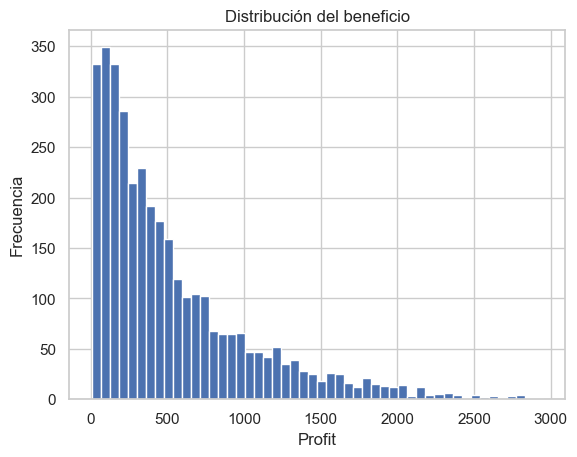

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Profit'], bins=50)
plt.title("Distribución del beneficio")
plt.xlabel("Profit")
plt.ylabel("Frecuencia")
plt.show()

In [14]:
(df['Profit'] < 0).value_counts()

Profit
False    3500
Name: count, dtype: int64

In [15]:
df.groupby('Category')['Profit'].mean().sort_values()

Category
Office         519.313389
Accessories    525.399529
Electronics    529.957285
Name: Profit, dtype: float64

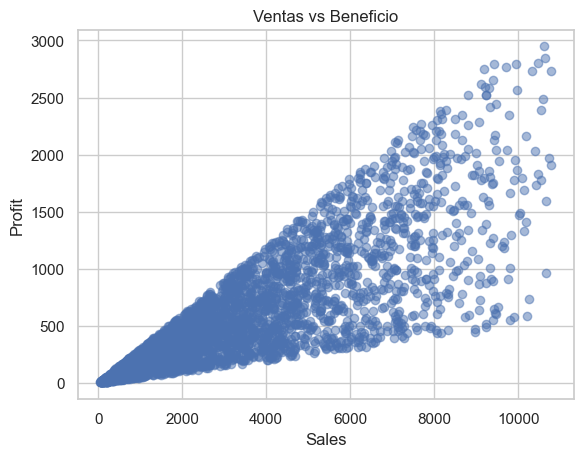

In [17]:
plt.figure()
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title("Ventas vs Beneficio")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()